<a href="https://colab.research.google.com/github/Jeslome/Prueba/blob/main/Parcial2_no_parametrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 (Impar) Estadísitica No paramétrica. Profesor Ramón Giraldo. 2023.

## Estudiante Jessica López Mejía **Código** 1032453305

**1** Simule $n$ cantidad de datos de$ X \sim N(\mu, \sigma)$ usando el siguiente código en R (aunque se utilizará código Python dada las indicaciones del profesor).

**Solución**

Para nuestro caso tomarenos:
$$n=100$$
$$\mu=8$$
$$\sigma=2$$
$$semilla=1114$$

In [ ]:
import numpy as np
np.random.seed(1114)
data = np.random.normal(loc=8, scale=2, size=100)
print(data)

[ 6.76631704  8.99321124  5.14197691  7.07635299  4.74486378  8.57007156
  6.43563549  4.56496241  8.73546     9.55695151  8.0795432   8.32764429
  6.45090226  8.49607862  5.92081739  9.22235687  5.32035118  7.94776482
  9.23808014  7.93424277  5.97186332  5.00338248  7.26980261  9.05953143
  9.51193339  5.31228615 10.48185444  7.92932529  6.32883291  9.80640442
  8.18864411  7.4655247   9.12795138  8.03048439  7.05988222  5.42197714
  7.45065237  8.14316272  8.91117986  7.4496483   9.22662757  9.63515165
  8.56032912  6.65528149  6.90913768  5.55540778 11.34237238  5.42829366
  8.25612592  7.39500318  6.13361008 10.2482055   5.48263113  8.17264892
 10.06001275  8.62957053  8.32439613  6.17180977  9.17271236 10.37781888
  4.02171886  8.34770195  7.2850038   9.75736119  5.92826724 11.18153407
  9.97368037  8.11098842  9.86965753  6.7731253   7.64370977  7.08729497
  7.55902629  7.53058245  8.2424999  11.0499322   7.52931815  5.66940953
  8.56444045  9.80186929  8.79679623  6.59992894  4

**a)** El h de la regla de Silverman es:0.648

In [ ]:
import numpy as np
from scipy.stats import iqr, norm

np.random.seed(1114)
n = 100
mu = 8
sigma = 2
datos = np.random.normal(loc=mu, scale=sigma, size=n)

min_datos = np.min(datos)
max_datos = np.max(datos)

ric = iqr(datos)
s = np.std(datos)

h = 0.9 * min(s, ric / 1.34) * (n ** (-1 / 5))

from statsmodels.nonparametric.kde import KDEUnivariate
d = KDEUnivariate(datos)
d.fit()
bw = d.bw

print(h)
print(bw)


0.6482070495996758
0.7667281183284516


La variable h se calcula utilizando la regla empírica de Silverman, que es un método comúnmente utilizado para elegir el ancho de banda de una estimación de densidad de kernel. La fórmula para la regla empírica de Silverman es h=0.9*min(s,ric/1.34)*(n**(-1/5)), donde s es la desviación estándar de los datos, ric es el rango intercuartílico de los datos y n es el número de puntos de datos. Esta fórmula proporciona un buen punto de partida para elegir el ancho de banda, pero no siempre produce los mejores resultados para todos los conjuntos de datos. En la práctica, puede ser necesario ajustar el ancho de banda en función de las características específicas de los datos que se están analizando.

**b)** Asumiedo un Kernel Gaussiano $MISE(\hat{f}_k) =0.0019$

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm

np.random.seed(1114)
n = 100
mu = 8
sigma = 2
datos = np.random.normal(loc=mu, scale=sigma, size=n)

def f_hat_k(x, datos, h):
    n = len(datos)
    return (1 / (n * h)) * np.sum(norm.pdf((x - datos) / h))

def integrand(x, datos, h):
    return (f_hat_k(x, datos, h) - norm.pdf(x, loc=mu, scale=sigma)) ** 2

h = 1.06 * np.std(datos) * (n ** (-1 / 5))
result = quad(integrand, -np.inf, np.inf, args=(datos, h))[0]

print(result)

0.001925537017068349


**c)** Usando h de la regla de Silverman, el valor estimado de la densidad
en el mínimo de la muestra es $\hat{f}(x)=0.0334$

In [ ]:
np.random.seed(1114)
n = 100
mu = 8
sigma = 2
datos = np.random.normal(loc=mu, scale=sigma, size=n)

def f_hat_k(x, datos, h):
    n = len(datos)
    return (1 / (n * h)) * np.sum(norm.pdf((x - datos) / h))

h = 0.9 * min(np.std(datos), iqr(datos) / 1.34) * (n ** (-1 / 5))
x_min = np.min(datos)
result = f_hat_k(x_min, datos, h)

print(result)

0.03347810436354607


Un IC del $95\%$ para $\hat{f}(x)$, considerando despreciable el sesgo, en el mínimo de la muestra es: **(-0.109, 0.176)**

In [ ]:
import numpy as np
from scipy.stats import norm, iqr

np.random.seed(1114)
n = 100
mu = 8
sigma = 2
datos = np.random.normal(loc=mu, scale=sigma, size=n)

def f_hat_k(x, datos, h):
    n = len(datos)
    return (1 / (n * h)) * np.sum(norm.pdf((x - datos) / h))

h = 0.9 * min(np.std(datos), iqr(datos) / 1.34) * (n ** (-1 / 5))
x_min = np.min(datos)
f_hat_k_x_min = f_hat_k(x_min, datos, h)

se = np.sqrt((1 / (n * h * np.sqrt(2 * np.pi))) * (1 - (2 * h ** 2 * norm.pdf(0) ** 2)))
z = norm.ppf(0.975)

ci_lower = f_hat_k_x_min - z * se
ci_upper = f_hat_k_x_min + z * se

print(ci_lower, ci_upper)

-0.10963161187703085 0.17658782060412298


**d)** El h de referencia a la normal es: **0.76**

In [ ]:
import numpy as np
from scipy.stats import norm

np.random.seed(1114)
n = 100
mu = 8
sigma = 2
datos = np.random.normal(loc=mu, scale=sigma, size=n)

h = 1.06 * np.std(datos) * (n ** (-1 / 5))

print(h)

0.763443858417396


Este código genera una muestra aleatoria de $n$ puntos de datos de una distribución normal con media $\mu$ y desviación estándar $\sigma$. Luego calcula el ancho de banda de referencia $h$ para una distribución normal utilizando la fórmula h=1.06*np.std(datos)*(n**(-1/5)), donde np.std(datos) es la desviación estándar de los datos y n es el número de puntos de datos. Esta fórmula proporciona un valor de referencia para el ancho de banda que se puede utilizar como punto de partida al elegir el ancho de banda para una estimación de densidad del núcleo.

Las estimaciones de la media y la varianza son, respectivamente, **7.89**, **1.809**

In [ ]:
media_estimada = np.mean(datos)
desviacion_estandar_estimada = np.std(datos)
print("Media estimada:", media_estimada)
print("Desviación estándar estimada:", desviacion_estandar_estimada)

Media estimada: 7.893789451078702
Desviación estándar estimada: 1.8091361029980926


Con estos valores y asumiendo $x =$ el máximo de la muestra, encuentre:$E(\hat{f}_k(x))=0.0449$, $\hat{ee}(\hat{f}_k(x)=0.000147$

In [ ]:
import numpy as np
from scipy.stats import norm
from numpy import var

np.random.seed(1114)
mu = 8
sigma = 2
n = 100
datos = np.random.normal(loc=mu, scale=sigma, size=n)

h = round(1.06 * np.std(datos) * n ** (-1 / 5), 2)
x = max(datos)
mue=sum(datos) / len(datos)
ve=var(datos)
v=ve+h**2
expected_value = norm.pdf(x, loc=mue, scale=v)
standard_error = (1/n)*(norm.pdf(0,0,2*h**2)*norm.pdf(x,mue,ve+(1/(h**2)))-(norm.pdf(x,mue,ve+h**2))**2 )

print(expected_value)
print(standard_error)

0.04492213929196765
0.00014768012216638085


**e)** Las bandas de referencia a la normal son:**[0.0136,0.0762]**

In [ ]:
import numpy as np
from scipy.stats import norm

np.random.seed(1114)
mu = 8
sigma = 2
n = 100
datos = np.random.normal(loc=mu, scale=sigma, size=n)

h = round(1.06 * np.std(datos) * n ** (-1 / 5), 2)
x = max(datos)

mue=sum(datos) / len(datos)
ve=var(datos)
v=ve+h**2
expected_value = norm.pdf(x, loc=mue, scale=v)
standard_error = ((1/n)*(norm.pdf(0,0,2*h**2)*norm.pdf(x,mue,ve+(1/(h**2)))-(norm.pdf(x,mue,ve+h**2))**2 ))**(1/2)


lower_band = expected_value - 2.575 * standard_error
upper_band = expected_value + 2.575 * standard_error

print(standard_error)
print(f"The lower normal reference band at x = max(datos) is: {round(lower_band, 4)}")
print(f"The upper normal reference band at x = max(datos) is: {round(upper_band, 4)}")

0.012152371051213869
The lower normal reference band at x = max(datos) is: 0.0136
The upper normal reference band at x = max(datos) is: 0.0762


**f)** Haga un test de normalidad usando la función nise de la librería sm de R.(código equivalente en python) El valor p de la prueba es **0.554**

P value del test de normalidad: 0.554


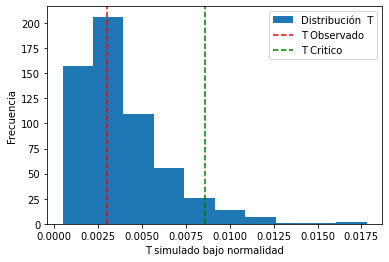

In [ ]:
import numpy as np
from scipy.stats import norm, gaussian_kde
import matplotlib.pyplot as plt

def nise(data):
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), num=1000)
    density = kde.evaluate(x_values)
    true_density = norm.pdf(x_values, loc=np.mean(data), scale=np.std(data))
    ise = np.trapz((density - true_density) ** 2, x=x_values)
    return ise

np.random.seed(1114)
mu = 8
sigma = 2
n = 100
datos = np.random.normal(loc=mu, scale=sigma, size=n)

Tobser = nise(datos)
ts = 1000
Tsimulacion = [nise(np.random.normal(size=n)) for _ in range(ts)]
pval = sum(Tsimulacion > Tobser) / ts

print(f"P value del test de normalidad: {pval}")

plt.hist(Tsimulacion, density=True, label='Distribución  T')
plt.axvline(x=Tobser, color='r', linestyle='--', label='T Observado')
plt.axvline(x=np.quantile(Tsimulacion, 0.95), color='g', linestyle='--', label='T Critico')

plt.xlabel('T simulado bajo normalidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Teniendo en cuenta lo mostrado en la figura expuesta, podemos afirmar que si existe normalidad en los datos, por lo cual no se rechaza la hipótesis nula.

**2** Sea $X \sim \mathrm{N}(\mu, \sigma^2)$. Compruebe que $R(f'') = \int_{-\infty}^{\infty} [f"(x)]^2 \, dx = \frac{3}{8\sigma^5\sqrt{\pi}}$

Para ello, vamos a encontrar la segunda derivada de la densidad de una normal:
Tenemos que :

$$f'(x)= \left[\frac{1}{\sqrt{(2 \pi)} \,\sigma} \exp \left \{ { \frac{-(x - \mu)^2}{ 2\sigma^2}} \right \}\right]'$$
$$
= \frac{1}{\sqrt{2 \pi} \,\sigma} \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} \left (\frac{-2(x - \mu)}{ 2\sigma^2} \right)
$$
     
$$=-\frac{(x - \mu)}{\sqrt{2 \pi} \,\sigma^3} \exp \left \{  \frac{-(x - \mu)^2}{2 \sigma^2}  \right \}
$$

y hallando la segunda derivada:

 $$f'' (x) =  -\frac{x }{\sqrt{2 \pi} \,\sigma^3} \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \}  -\frac{(x - \mu)}{\sqrt{2 \pi} \,\sigma^3} \, \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} \left (\frac{-2(x - \mu)}{ 2\sigma^2} \right)$$
  $$=-\frac{x }{\sqrt{2 \pi} \,\sigma^3} \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} + \frac{(x - \mu)^2}{\sqrt{2 \pi} \,\sigma^5} \, \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} $$
$$=  \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} \left( \frac{(x - \mu)^2}{\sqrt{2 \pi} \,\sigma^5} -\frac{1 }{\sqrt{2 \pi} \,\sigma^3}\right)$$
$$= \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} \left( \frac{(x - \mu)^2-\sigma^2}{\sqrt{2 \pi} \,\sigma^5} \right) $$

Luego:

$$
R(f'') = \int_{-\infty}^{\infty} [f''(x)]^2 \, dx
$$
$$=\int_{-\infty}^{\infty} \left [ \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \} \left( \frac{(x - \mu)^2-\sigma^2}{\sqrt{2 \pi} \,\sigma^5} \right)  \right]^2 \,dx$$
$$= \frac{1}{2\pi \sigma^{10}}  \int_{-\infty}^{\infty} \left( {(x - \mu)^2-\sigma^2} \right)^2 \left [ \exp \left \{  \frac{-(x - \mu)^2}{ 2\sigma^2}  \right \}  \right]^2 \,dx$$

Sea $Z=\frac{X-\mu}{\sigma}$, con $\sigma \, dz=dx$, por lo que $X-\mu=Z\sigma$

$$
R(f'') = \frac{1}{2\pi \sigma^{10}}  \int_{-\infty}^{\infty} \left( {(z\sigma)^2-\sigma^2} \right)^2  \exp \left \{  \frac{-2 z^2}{2}  \right \}  \sigma\,dz    
$$

$$
= \frac{1}{2\pi \sigma^{10}} \left[ \sigma^5  \int_{-\infty}^{\infty}z^4\exp(-z^2)\, dz -2\sigma^5 \int_{-\infty}^{\infty}\exp(-z^2) z^2 \, dz  + \sigma^5    \int_{-\infty}^{\infty}\exp(-z^2) \, dz \right]  \text{Como} \int_{-\infty}^{\infty} y \, dy= 2\int_{-\infty}^{0} y \, dy
$$

$$
=\frac{\sigma^5}{2\pi \sigma^{10}} \left[  \int_{-\infty}^{\infty}z^4\exp(-z^2)\, dz -2 \int_{-\infty}^{\infty}\exp(-z^2) z^2 \, dz  +     \int_{-\infty}^{\infty}\exp(-z^2) \, dz \right]
$$

$$
=\frac{1}{2\pi \sigma^{5}} \left[  \int_{-\infty}^{\infty}z^4\exp(-z^2)\, dz -2 \int_{-\infty}^{\infty}\exp(-z^2) z^2 \, dz  +     \int_{-\infty}^{\infty}\exp(-z^2) \, dz \right]
$$

$$
=\frac{1}{2\pi \sigma^5} \left[ \frac{3\sqrt{\pi}}{4}-2\frac{\sqrt{\pi}}{2} +\sqrt{\pi}      \right]  
$$

$$
= \frac{3}{8\sigma^5 \sqrt{\pi}}
$$

Como que sabemos que:$\int_{0}^{\infty} \exp{(-\alpha x^2)}\, dx= \frac{\sqrt{\pi}} {2\sqrt{\alpha}}$
$$\int_{-\infty}^{\infty}z^4\exp(-z^2)\, dz= \frac{3}{4} \sqrt{\pi}$$,   $$\int_{-\infty}^{\infty}z^2\exp(-z^2)\, dz= \frac{\sqrt{\pi}}{2}$$ y $$\int_{-\infty}^{\infty}\exp(-z^2)\, dz=\sqrt{\pi}$$

De esta manera queda comprobado

**3** Usando la regla de referencia a la normal compruebe que $h_{opt} = 1,059 \hat{\sigma}^{- \frac{1}{5}}$, con $\hat{\sigma}$ el mínimo de (RIC, s), con RIC el rango intercuartílico y s la desviación estándar muestral

Sea $X \sim N(\mu, \sigma^2)$, K(u) un Kernel Gaussiano con varianza $\sigma^2_K$, es decir $U \sim N(0, \sigma^2_K)$, y $\hat{f}_K(x)$ el estimador Kernel de la densidad con ancho de banda h. El error cuadrado medio integrado asintótico se define como $AMISE(\hat{f}) = \dfrac{R(K)}{nh} + \dfrac{\sigma^4_K h^4 R(f'')}{4}$.

$h_0$ que minimiza $AMISE( \hat{f})$

$$
\dfrac{\partial AMISE (\hat{f}_K)}{\partial h}= \dfrac{-R(K)}{nh^2} + \dfrac{4 h^3 \sigma^4_K R(f''(x))}{4}
$$

$$
= h^3 \sigma^4_K R(f''(x)) - \dfrac{R(K)}{nh^2}
$$

Luego, para hallar los puntos críticos:

$$\dfrac{\partial AMISE (\hat{f}_K)}{\partial h} = 0 $$
$$ h^3 \sigma^4_K R(f''(x)) - \dfrac{R(K)}{nh^2} = 0 $$
$$ h^3 \sigma^4_K R(f''(x)) = \dfrac{R(K)}{nh^2} $$
$$ h^5 = \dfrac{R(K)}{n \sigma^4_K R(f''(x))} $$

 Así,


$$h_0 = \dfrac{1}{n^{\frac{1}{5}}} \left( \dfrac{R(K)}{\sigma^4_K R(f''(x))} \right) ^{\frac{1}{5}}$$

Tenemos que $R(f(\cdot)) = \int f^2(\cdot) d\cdot$, luego $R(K) = \int K^2(u) du$ y $R(f''(x)) = \int (f''(x))^2 dx$

Teniendo en cuenta que un kernel Gaussiano es tal que $K(x) = \dfrac{1}{\sqrt{2 \pi} \sigma} e^{\frac{-x^2}{2 \sigma^2}}$, entonces:

$$ R(K) = \int K^2(u) du = \int \left( \dfrac{1}{\sqrt{2 \pi} \sigma_K} e^{\frac{-u^2}{2 \sigma^2_K}} \right)^2 du $$

$$= \dfrac{1}{2 \pi \sigma^2_K} \int e^{\frac{-u^2}{\sigma^2_K}} du$$
Por convenio, se toma $\sigma^2_K = 1$

$$= \dfrac{1}{2 \pi} \int e^{-u^2} $$

$$= \dfrac{1}{2 \pi} \sqrt{\pi} = \dfrac{\sqrt{\pi}}{2 \pi} $$

 Por su parte

$$R(f''(x)) = \int \left( f''(x) \right) ^2 dx $$
$$= \int \dfrac{e^{- \frac{(x - \mu)^2}{\sigma ^2}} [(x - \mu)^2 - \sigma^2]^2}{2 \pi \sigma^{10}} dx $$
$$= \dfrac{3}{8 \sigma^5 \sqrt{\pi}}$$

Reemplazando obtenemos,

$$h_0 = \dfrac{1}{n^{\frac{1}{5}}} \left( \dfrac{R(K)}{\sigma^4_K R(f''(x))} \right)^{\frac{1}{5}} $$
$$= \dfrac{1}{n^{\frac{1}{5}}} \left[ \dfrac{ \dfrac{ \sqrt{ \pi}}{2 \pi}}{\dfrac{3 \sigma^4_K}{8 \sigma^5 \sqrt{ \pi}}} \right] ^{\frac{1}{5}} $$
$$= \dfrac{1}{n^{ \frac{1}{5}}} \left( \dfrac{8 \sigma^5 \pi}{6 \sigma^4_K \pi} \right)^{\frac{1}{5}} $$
como $\sigma^2_K = 1$;
$$ = \dfrac{\sigma}{n^{ \frac{1}{5}}} \left( \dfrac{4}{3} \right) ^{\frac{1}{5}}$$

Por lo tanto, el h óptimo es $h_0 \approx 1.059 \dfrac{\sigma}{n^{ \frac{1}{5}}}$

Como vimos $h_{opt} = 1.059 \sigma n^{- \frac{1}{5}}$. Como $\sigma$ es un parámetro desconocido, se reemplaza por un estimador $\hat{\sigma}$;

$$ h_{sil} = 1.059 \hat{\sigma} n^{- \frac{1}{5}}$$

Para revisar el fundamento teórico de la regla de Silverman, usaremos que $E(s^2) = \sigma ^2$, con lo que se toma s como un estimador no-insesgado para $\sigma$, pues:

$$E(s) = E(\sqrt{s^2}) \leq \sqrt{E(s^2)} = \sqrt{\sigma^2} = \sigma$$

Además, se conoce la siguiente relación entre RIC y $\sigma$ para el caso de la distribución normal:

$$RIC  \approx 1.35 \sigma $$
    $$\sigma  \approx \dfrac{RIC}{1.35}$$

Como el rango intercuartílico es más robusto a la presencia de datos atípicos, entonces:

$$\hat{\sigma} = min\left \{s, \dfrac{RIC}{1.35} \right \}$$

De esta manera queda comprobado $h_{opt} = 1,059 \hat{\sigma}^{- \frac{1}{5}}$ usando la regla de  referencia a la normal.

**4** Sea $X \sim N(\mu, \sigma^2)$, K(u) un Kernel Gaussiano con varianza $h^2$, es decir $U \sim N(0, h^2)$ y $\hat{f}_K (x)$ el estimador Kernel de la densidad. Demuestre que (ver Bowman and Azzalini, 1997, page 41):

$$\hat{\mathbb{V}} (\hat{f}_K (x)) = \dfrac{1}{n} \left[ \Phi(0; 0, 2h^2) \Phi \left( x; \hat{\mu}, \hat{\sigma}^2 + \dfrac{h^2}{2} \right) - \Phi(x; \hat{\mu}, \hat{\sigma}^2 + h^2)^2 \right]$$

**Solución**

Tenemos que $\hat{f}_K(x) = \dfrac{1}{n} \displaystyle\sum_{i=1}^n \dfrac{1}{h} K\left( \dfrac{x - X_i}{h} \right) = \dfrac{1}{n} \displaystyle\sum_{i=1}^n K_h (x - X_i)$, luego:

$$ \mathbb{V}(\hat{f}_K(x)) = \mathbb{V} \left( \dfrac{1}{n} \displaystyle\sum_{i=1}^n K_h (x - X_i) \right) $$
    $$= \dfrac{1}{n^2} \mathbb{V} (\displaystyle\sum_{i=1}^n K_h (x-X)) $$
    $$= \dfrac{1}{n} \mathbb{V} (K_h (x-X)) $$
    $$= \dfrac{1}{n} \mathbb{E} (K_h^2 (x-X)) - \dfrac{1}{n} [\mathbb{E} (K_h (x-X))]^2$$

Para el valor de la derecha, recordemos que $\mathbb{E} (\hat{f}_K (x))$ es igual a la convolución de X y U, entonces,

  $$f_Z(z) = f_Z (x+u)  = \int K(u) f(x-u) du = \mathbb{E} (\hat{f}_K (x))$$

Como X y U son independientes y tienen distribución normal, podemos afirmar $X+U = Z \sim N(\mu, \sigma^2 + h^2)$, luego $f_Z(z) = \Phi (x; \hat{\mu}, \hat{\sigma}^2 + h^2)$, por lo tanto $\dfrac{1}{n} \left[ \mathbb{E} (K_h (x-X)) \right]^2 = \Phi (x; \hat{\mu}, \hat{\sigma}^2 + h^2)^2$.

Para el término de la izquierda, recordemos que $K(u)$ es un kernel gaussiano, por lo tanto es simétrico centrado en 0, luego $K(u) = K(-u)$, y que, usando la notación O con expansión de Taylor, se obtiene $f(x+uh) = f(x) + O(h)$, donde O(h) tiende a 0; con esto veamos;

$$\mathbb{E} (K_h^2 (x-X)) = \int_{-\infty}^{\infty} K_h^2(x-y) f(y) dy $$

$$= \int_{-\infty}^{\infty} \dfrac{1}{h^2} K^2 \left( \dfrac{x-y}{h} \right) f(y) dy $$
$$= \int_{-\infty}^{\infty} \dfrac{1}{h^2} K^2 \left[- \left( \dfrac{x-y}{h} \right) \right] f(y) dy ^{S_1} $$
$$=  \int_{-\infty}^{\infty} \dfrac{1}{h} K^2(u) f(x+uh) du $$
$$= \int_{-\infty}^{\infty} \dfrac{1}{h} K^2(u) f(x) du $$
$$= \int_{-\infty}^{\infty} \left(\dfrac{1}{\sqrt{2 \pi}h} e^{-\frac{u^2}{2h^2}} \right) ^2 f(x) du $$
$$= \int_{-\infty}^{\infty} \dfrac{1}{(\sqrt{2 \pi})^2 h^2} e^{- \dfrac{u^2}{h^2}} f(x) du $$
$$= \int_{-\infty}^{\infty} \dfrac{1}{(\sqrt{2 \pi})^2 h^2} \dfrac{1}{\frac {\sqrt {2}}{\sqrt {2}}} e^{-\frac{u^2}{h^2} \frac{1}{\frac{2}{2}}} f(x) du $$
$$= \dfrac{1}{\sqrt{2 \pi} \sqrt{2} h} \int_{-\infty}^{\infty} \dfrac{1}{\sqrt{2 \pi} \frac{h}{\sqrt{2}}} e^{-\frac{u^2}{2 \frac{h^2}{2}}} f(x) du $$
$$= \dfrac{1}{\sqrt{2 \pi} \sqrt{2} h} \int_{-\infty}^{\infty} K(u) f(x) du $$
$$= \Phi(0; 0, 2 h^2) \Phi \left(x; \hat{\mu}, \hat{\sigma}^2 + \dfrac{h^2}{2} \right)$$

Donde $S_1: u = - \dfrac{x-y}{h} ; du = \dfrac{dy}{h}$. Así,


 $$\hat{\mathbb{V}} (\hat{f}_K (x)) = \dfrac{1}{n} \left[ \mathbb{E} (K_h^2 (x-X)) - (\mathbb{E} (K_h (x-X)))^2 \right] $$
    $$= \dfrac{1}{n} \left[ \Phi(0; 0, 2h^2) \Phi \left(x; \hat{\mu}, \hat{\sigma} + \dfrac{h^2}{2} \right) - \Phi(x; \hat{\mu}, \hat{\sigma}^2 + h^2)^2 \right]$$

**5** Simule n2 = 100 datos de Y ∼ Weibull (α =2 , β = 1). $H0 : f_X(x) = f_Y (y)$ versus $H_a : f_X(x) \neq f_Y (y)$, con $f_X(x)$ a la densidad definida en el punto 1. Verifique que el código escrito entregado no tiene errores.

Fijamos un nivel de significancia del 5%

In [ ]:
# Escenario (b): fX(x) != fY(y)
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import weibull_min

# Parámetros de la distribución Weibull
k = 2
lam = 1
# Generar 100 números aleatorios de una distribución Weibull
y = weibull_min.rvs(k, scale=lam, size=100)

#Distribucion inicial
np.random.seed(1114)
x = np.random.normal(loc=8, scale=2, size=100)

statistic, pvalue = ks_2samp(x, y)
print(f"Escenario (b): Estadístico = {statistic:.4f}, Valor-p = {pvalue:}")

Escenario (b): Estadístico = 1.0000, Valor-p = 2.2087606931995054e-59


Por lo que hay suficiente evidencia estadística para rechazar la hipótesis nula( dado que p-value=2.2087606931995054e-59<0.05).Por lo que con un nivel de confianza del 95% podemos decir que $f_X(x) \neq f_Y (y)$